In [28]:
import blackjackSim as bjs
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import warnings
import uuid

In [2]:
hitbutton = widgets.Button(description = "Hit",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Hit",
                          icon = "hand-fist")

def hbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.hit()
    
hitbutton.on_click(hbc) #runs hbc(hitbutton) when you click the hit button

staybutton = widgets.Button(description = "Stand",
                          disabled = False, 
                          button_style = '',
                          tooltip = "Stand",
                          icon = "hand")

def sbc(b):
    clear_output()
    display(hitbutton)
    display(staybutton)
    game.stay()
    
staybutton.on_click(sbc) #runs sbc(staybutton) when you click the stay button

Button(description='Hit', icon='hand-fist', style=ButtonStyle(), tooltip='Hit')

Button(description='Stand', icon='hand', style=ButtonStyle(), tooltip='Stand')

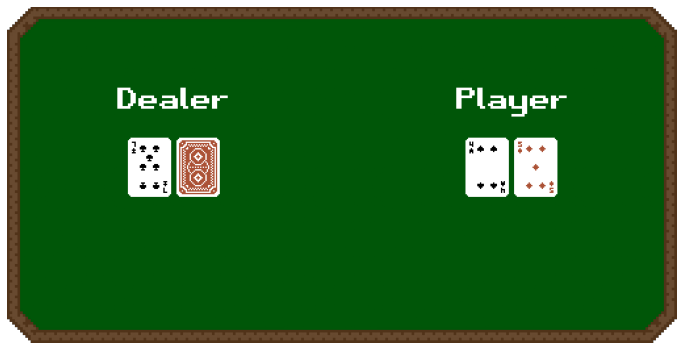

In [4]:
game = bjs.Blackjack(draw = True)

display(hitbutton)
display(staybutton)

In [5]:
game.aces()

0

In [6]:
import random

def sim_winrate(threshold): #simulation loop as a function of how often the player stays
    hit_threshold = threshold

    n_wins = 0
    iterations = 30000
    win = []
    aces = []
    points = []
    dealer_card = []

    hit = []
    round_ = []
    game_number = []

    current_game = 1
    instant_gameovers = 0
    for i in range(iterations):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)

            for j in range(current_round): #assigning win and game labels to all turns
                game_number.append(current_game)
                win.append(game.player_win)
            
            if game.player_win == True:
                n_wins += 1
            
            current_game += 1
    
    return n_wins/iterations


In [7]:
thresholds = []
winrates = []
for i in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1.00]: #
    winrate = sim_winrate(i)
    print(f"Threshold: {i}, Winrate: {winrate}")
    thresholds.append(i)
    winrates.append(winrate)

Threshold: 0.0, Winrate: 0.0
Threshold: 0.1, Winrate: 0.023
Threshold: 0.2, Winrate: 0.04226666666666667
Threshold: 0.3, Winrate: 0.05793333333333334
Threshold: 0.4, Winrate: 0.0671
Threshold: 0.5, Winrate: 0.07616666666666666
Threshold: 0.6, Winrate: 0.08296666666666666
Threshold: 0.7, Winrate: 0.0885
Threshold: 0.8, Winrate: 0.0894
Threshold: 0.9, Winrate: 0.09026666666666666
Threshold: 0.95, Winrate: 0.08936666666666666
Threshold: 0.99, Winrate: 0.08836666666666666
Threshold: 1.0, Winrate: 0.08943333333333334


Text(0.5, 0, 'Rate of staying')

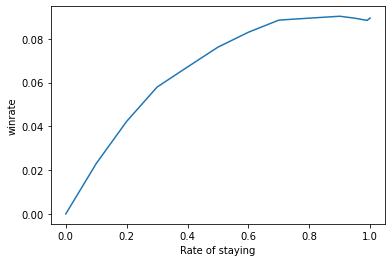

In [8]:
plt.plot(thresholds, winrates)
plt.ylabel("winrate")
plt.xlabel("Rate of staying")

In [8]:
hit_threshold = 0.7 #if random.random() is above this number, hit
n_wins = 0 #number of wins
iterations = 100000 #number of games to simulate
#Simulation output
win = [] # Win(1), Loss(0)
aces = [] # Number of aces in player's hand
points = [] # Number of points the player's hand is worth
dealer_card = [] # Value/rank of dealer's face-up card

hit = [] # Whether the player did hit or stay
round_ = [] # Which round of the game it is, where the first round of the game is 1
game_number = [] # Number assigned to that game

current_game = 1 # Number assigned to that game
instant_gameovers = 0 # How many times the game is won just from the dealing of cards, e.g. player or dealer receives 21
for i in range(iterations):
    game = bjs.Blackjack() #initialize game
    current_round = 0
    if game.is_active == False: # Only activated in case of an instant game over
        instant_gameovers += 1
        current_game += 1
        continue
    else:
        while game.is_active == True: # While the game still hasn't ended:
            if game.point() < 11: # Always hit if you have 10 points or less, it's impossible to lose
                game.hit()
                hit.append(1)
                current_round += 1
            elif random.random() > hit_threshold: # Hit if above threshold
                game.hit()
                hit.append(1)
                current_round += 1
            else: # Stay if below threshold
                game.stay()
                hit.append(0)
                current_round += 1

            #Add features to lists
            points.append(game.point())
            dealer_card.append(game.dealer[0])
            aces.append(game.aces())
            round_.append(current_round)

        for j in range(current_round): #assigning win and game labels to all turns
            game_number.append(current_game)
            win.append(game.player_win)

        if game.player_win == True:
            n_wins += 1

        current_game += 1

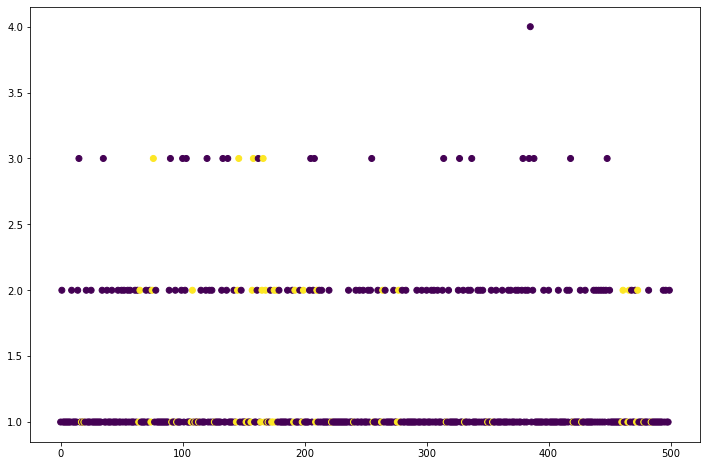

In [10]:
#Coloring graph to visualize winning games and rounds
n_turns = 500 #number of turns to graph
win_colors = []
for i in win:
    win_colors.append(int(i))

plt.figure(figsize = (12,8))
plt.scatter(np.arange(len(round_))[:n_turns], round_[:n_turns], c = win_colors[:n_turns])

In [109]:
label = [] #list of labels. If 1, then either a hit resulted in a win, or a stay resulted in a loss. If 0, then either a
           #stay resulted in a win, or a hit resulted in a loss. This is a big assumption, and how accurate it is will
           #determine how well the model can play blackjack
for i in range(len(win)):
    if win[i] == 0:
        if hit[i] == 0:
            label.append(1) #should've hit
        elif hit[i] == 1:
            label.append(0) #should've stayed
    elif win[i] == 1:
        label.append(hit[i]) #did the right thing, so just add that

In [121]:
np.array(dealer_card)[:,1]

array(['Jack', 'Queen', '3', ..., '4', 'Jack', 'Jack'], dtype='<U8')

In [131]:
import pandas as pd
data = pd.DataFrame()
data["label"] = label
data["win"] = win
data["points"] = points
data["aces"] = aces


data["dealer card"] = np.array(dealer_card)[:,1]
data["dealer card"] = data["dealer card"].replace({"Jack":10, "Queen":10, "King":10, "Ace":11}) #Change names to numbers
data["dealer card"] = pd.to_numeric(data["dealer card"]) #Change series dtype from string to a numeric 
data["round"] = round_
data["game number"] = game_number

In [141]:
win_data = data[ data["win"] == True]
loss_data = data[ data["win"] == False]

from sklearn.model_selection import train_test_split

In [140]:
test_rounds = len(win_data)/2 # 50% test size for win data
loss_proportion = test_rounds/len(loss_data) # this portion test size for loss data

#Split winning and losing data using train_test_split() so they have the same size
features_train_w, features_test_w, labels_train_w, labels_test_w = train_test_split()

(13441, 108904)

In [148]:
win_data

,label,win,points,aces,dealer card,round,game number
5,0,True,20,0,9,1,7
24,0,True,20,0,10,1,25
52,0,True,19,1,10,1,44
55,0,True,18,0,6,1,47
70,0,True,20,1,5,1,58
...,...,...,...,...,...,...,...
122306,1,True,20,0,4,1,99974
122307,0,True,20,0,4,2,99974
122308,0,True,19,0,8,1,99975
122324,1,True,21,0,2,1,99987


In [87]:
#We will create a function that will run the game x amount of tumes and will record the results
def sim_game(x, h):
    #Initialize lists
    hit_threshold = h
    n_wins = 0
    win = []
    points = []
    aces = []
    dealer_card = []
    hit = []
    round_ = []
    game_number = []
    
    current_game = 1
    instant_gameovers = 0
    for i in range(x):
        game = bjs.Blackjack()
        current_round = 0
        if game.is_active == False:
            instant_gameovers += 1
            current_game += 1
            
            continue
        else:
            while game.is_active == True:
                if game.point() < 11:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                elif random.random() > hit_threshold:
                    game.hit()
                    hit.append(1)
                    current_round += 1
                else:
                    game.stay()
                    hit.append(0)
                    current_round += 1

                #Add features to lists
                points.append(game.point())
                dealer_card.append(game.dealer[0])
                aces.append(game.aces())
                round_.append(current_round)
                

            for j in range(current_round):
                game_number.append(current_game)
                win.append(game.player_win)

            if game.player_win == True:
                n_wins += 1

            current_game += 1

         #using these features generate a dataframe
    label = []
    for i in range(len(win)):
        if win[i] == 0:
            if hit[i] == 0:
                label.append(1) #should've hit
            elif hit[i] == 1:
                label.append(0) #should've stayed
        elif win[i] == 1:
            label.append(hit[i]) #did the right thing, so just add that
    data = pd.DataFrame()
    data["game number"] = game_number
    data["round"] = round_
    data["label"] = label
    data["win"] = win
    data["points"] = points
    data["aces"] = aces
    data["dealer card"] = np.array(dealer_card)[:,1]
    data["dealer card"] = data["dealer card"].replace({"Jack":10, "Queen":10, "King":10, "Ace":11})
    data["dealer card"] = pd.to_numeric(data["dealer card"])
    data['game_id'] = np.zeros(len(data))
    #assign a unique id based on the game number using uuid
    for i in range(len(data)):
        data['game_id'][i] = uuid.uuid4()
        if i != 0:
            if data["game number"][i] == data["game number"][i-1]:
                data['game_id'][i] = data['game_id'][i-1]
    

    return data

    

In [88]:
sim_game(50, 0.5)

,game number,round,label,win,points,aces,dealer card,game_id
0,1,1,0,False,15,0,7,62d4fd82-cd4f-4bc0-944c-9efd05563aba
1,1,2,1,False,15,0,7,62d4fd82-cd4f-4bc0-944c-9efd05563aba
2,2,1,1,False,14,0,10,bc95dbaa-860f-41ff-a202-ed2251b1c930
3,3,1,0,False,27,0,4,3315a5b2-a18f-4e5a-b8d8-63ddd5815493
4,4,1,1,False,20,0,4,4fdfb2a7-086e-454a-988e-8dbe5ff632d8
...,...,...,...,...,...,...,...,...
69,48,1,0,False,23,0,4,6403aba4-5fae-4239-8720-3a3b4d8b9c9d
70,49,1,0,False,12,1,3,f164bceb-6916-4429-8b3f-1ceb26651e66
71,49,2,1,False,12,1,3,f164bceb-6916-4429-8b3f-1ceb26651e66
72,50,1,1,True,18,0,11,02c855d4-41ec-471e-841c-cc0f01f464ee


In [164]:
#make a function that will randoly select wins in one dataframe and lose in another
def rand_win_lose(itter, thresh):
    df = sim_game(itter, thresh)
    df_win = df[df["win"] == True]
    df_lose = df[df["win"] == False]
    new_df = pd.concat([df_win.groupby("game number")['label', 'win', 'points', 'aces', 'dealer card', 'round', 'game number', 'game_id']
        .apply(pd.Series.sample, frac=.8).reset_index(drop=True), 
        df_lose.groupby("game number")['label', 'win', 'points', 'aces', 'dealer card', 'round', 'game number', 'game_id']
        .apply(pd.Series.sample, frac=.2).reset_index(drop=True)])
    #sort the dataframe by game number and points
    #new_df.sort_values(by = ["points"]).groupby("game_id")
    
    
    return new_df

In [165]:
all_df = pd.DataFrame()
for i in range(100):
    warnings.filterwarnings(action='ignore')
    
    new_df = rand_win_lose(100, 0.5)
    #concat all df with new df
    all_df = pd.concat([all_df, new_df])
   
    #update the progress bar
    print("Progress: ", i+1, "out of 100")
    

    

Progress:  1 out of 100
Progress:  2 out of 100
Progress:  3 out of 100
Progress:  4 out of 100
Progress:  5 out of 100
Progress:  6 out of 100
Progress:  7 out of 100
Progress:  8 out of 100
Progress:  9 out of 100
Progress:  10 out of 100
Progress:  11 out of 100
Progress:  12 out of 100
Progress:  13 out of 100
Progress:  14 out of 100
Progress:  15 out of 100
Progress:  16 out of 100
Progress:  17 out of 100
Progress:  18 out of 100
Progress:  19 out of 100
Progress:  20 out of 100
Progress:  21 out of 100
Progress:  22 out of 100
Progress:  23 out of 100
Progress:  24 out of 100
Progress:  25 out of 100
Progress:  26 out of 100
Progress:  27 out of 100
Progress:  28 out of 100
Progress:  29 out of 100
Progress:  30 out of 100
Progress:  31 out of 100
Progress:  32 out of 100
Progress:  33 out of 100
Progress:  34 out of 100
Progress:  35 out of 100
Progress:  36 out of 100
Progress:  37 out of 100
Progress:  38 out of 100
Progress:  39 out of 100
Progress:  40 out of 100
Progress:

In [166]:
#reset index for all_df
#group by game_id and sort by points
all_df.reset_index(drop=True, inplace=True)
new_df = all_df
#new_df.sort_values(by = ["points"]).groupby("game_id")
all_df



,label,win,points,aces,dealer card,round,game number,game_id
0,1,True,20,0,10,1,6,6cdf2ece-4b00-4a45-8e82-11e28a7acbbb
1,0,True,20,0,10,2,6,6cdf2ece-4b00-4a45-8e82-11e28a7acbbb
2,1,True,19,0,2,1,45,19208449-b940-47c5-9ad1-afa0f601b4ef
3,0,True,19,0,2,2,45,19208449-b940-47c5-9ad1-afa0f601b4ef
4,0,True,20,0,10,1,47,1027fece-4693-40bb-987b-c26b414be6fe
...,...,...,...,...,...,...,...,...
1896,1,False,14,0,10,3,1,4838a4ff-a220-43e3-8d4a-e4293fb2c044
1897,0,False,19,1,10,2,46,7d268e66-406a-49c9-8d27-f6847b0b09e4
1898,0,False,19,1,6,2,53,85b1a44c-4564-4989-8f3f-31bd83b43b61
1899,0,False,16,0,4,2,65,674efcf8-3c25-4934-87d6-8c7e36688f29


In [167]:
#convert game_id to string
all_df['game_id'] = all_df['game_id'].apply(str)


In [168]:
#save the dataframe to a csv
all_df.to_csv("blackjack_data.csv")

In [169]:
all_df[all_df['game_id'] == '4838a4ff-a220-43e3-8d4a-e4293fb2c044']

,label,win,points,aces,dealer card,round,game number,game_id
1896,1,False,14,0,10,3,1,4838a4ff-a220-43e3-8d4a-e4293fb2c044
